# Import Lib and Read DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yvelazquez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yvelazquez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(22524, 6)

In [6]:
df.head(5)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadBears_ \n@lkinc_algo \n@al_goanna \n\n#WorldCup2022 https://t.co/Oga3TzvG5h,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k",negative


In [7]:
df = df.iloc[:, 1:]

In [8]:
df.describe()

,Number of Likes
count,22524.000000
mean,23.822856
std,2128.018705
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,316867.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     22524 non-null  object
 1   Number of Likes  22524 non-null  int64 
 2   Source of Tweet  22524 non-null  object
 3   Tweet            22524 non-null  object
 4   Sentiment        22524 non-null  object
dtypes: int64(1), object(4)
memory usage: 880.0+ KB


In [10]:
df.nunique()

Date Created       14412
Number of Likes      271
Source of Tweet      109
Tweet              22360
Sentiment              3
dtype: int64

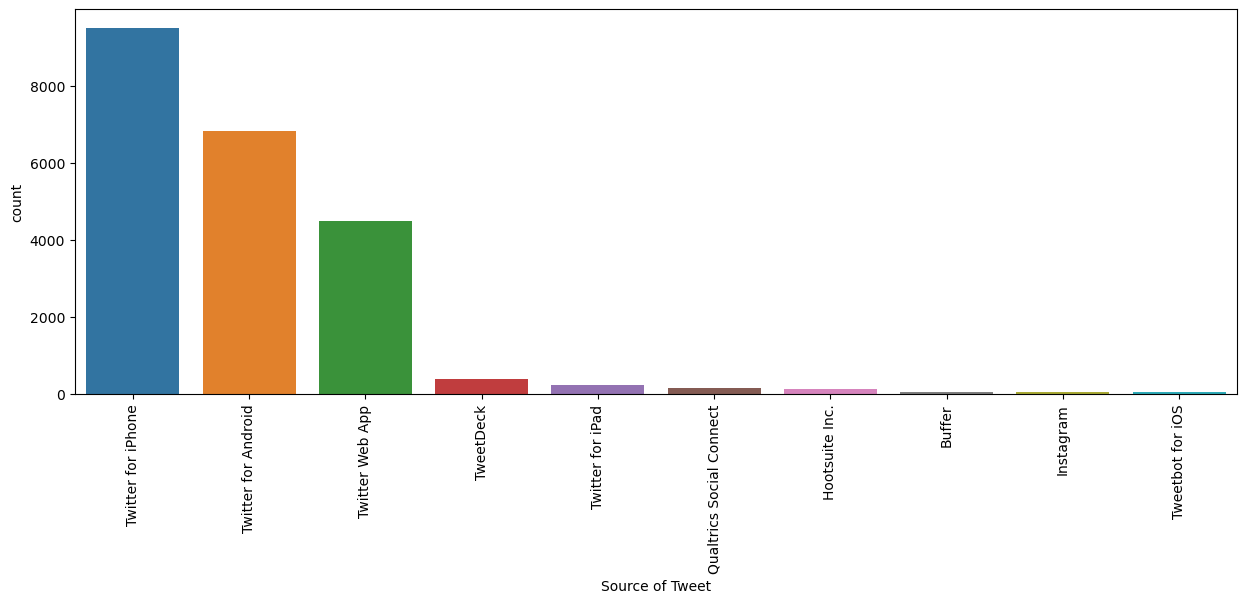

In [11]:
plt.figure(figsize = (15,5));
sns.countplot(data = df , x = "Source of Tweet" ,
              order = df['Source of Tweet'].value_counts(ascending = False).iloc[:10].index);
plt.xticks(rotation = 90);


<AxesSubplot:>

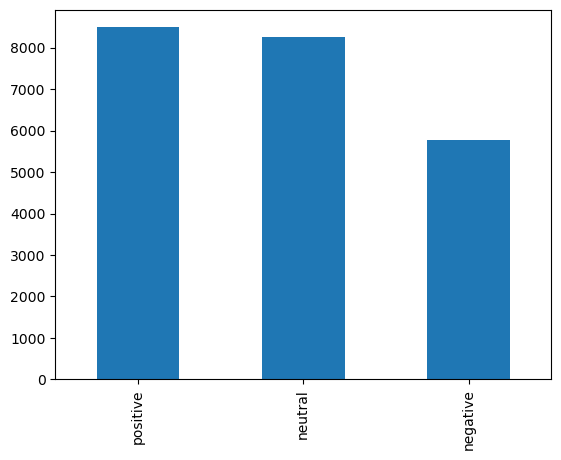

In [12]:
sent = df['Sentiment'].value_counts()
sent.plot(kind = "bar")

In [13]:
df['readable_dates'] = pd.to_datetime(df['Date Created'])
df['Date Created2'] = df['readable_dates'].dt.strftime("%Y-%m-%d")
df['hours'] = pd.to_datetime(df['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.hour

In [14]:
#Transform all the words to lowercase
df['Tweet'] = df.Tweet.str.lower()

In [15]:
df.head(1)

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,readable_dates,Date Created2,hours
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,what are we drinking today @tucantribe \n@madbears_ \n@lkinc_algo \n@al_goanna \n\n#worldcup2022 https://t.co/oga3tzvg5h,neutral,2022-11-20 23:59:21+00:00,2022-11-20,23


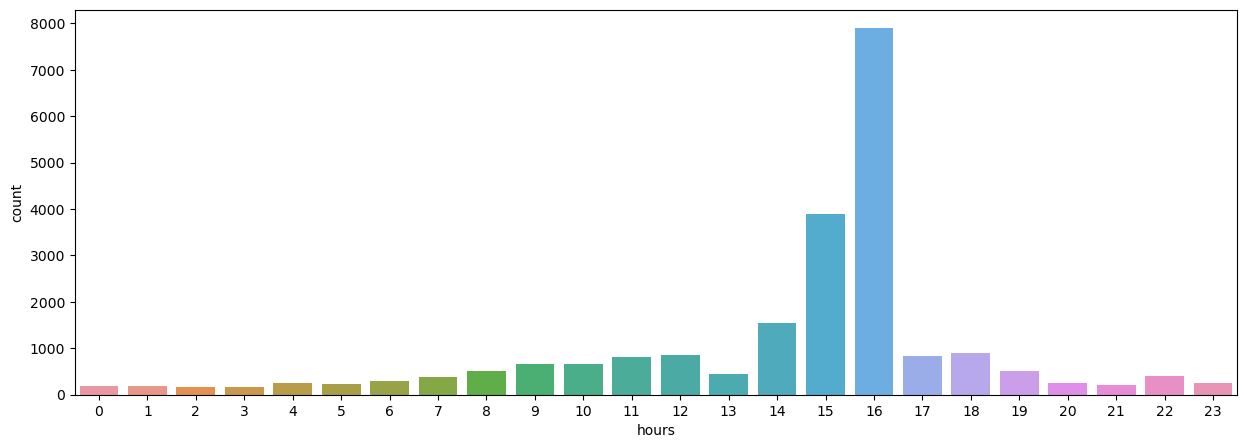

In [16]:
plt.figure(figsize = (15,5));
sns.countplot(data = df , x = "hours");

In [17]:
# Functions
### Clean Tweet
def clean(tweet):
    tweet = tweet.split(' ')
    tweet = ' '.join(tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+' , '' , tweet)
    tweet = re.sub('\n' , '' , tweet)
    tweet = re.sub(r'@','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'!','',tweet)
    tweet = tweet.replace(".","")
    tweet = tweet.replace("(","")
    tweet = tweet.replace(")","")
    tweet = tweet.replace('"'," ")
    tweet = tweet.replace('$'," ")
    tweet = tweet.replace('%'," ")
    tweet = tweet.replace('&'," ")
    tweet = tweet.replace('worldcup2022'," ")
    tweet = tweet.replace('qatarworldcup2022'," ")
    tweet = tweet.replace('fifa'," ")
    tweet = tweet.replace('worldcup'," ")
    tweet = tweet.replace('qatar'," ")
    tweet = tweet.replace('qatar2022'," ")
    tweet = " ".join(tweet.split())
    return tweet

In [18]:
# Apply the function to the 'tweets' column
df['cleaned_tweets'] = df['Tweet'].apply(clean)

In [19]:
df.head(5)

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,readable_dates,Date Created2,hours,cleaned_tweets
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,what are we drinking today @tucantribe \n@madbears_ \n@lkinc_algo \n@al_goanna \n\n#worldcup2022 https://t.co/oga3tzvg5h,neutral,2022-11-20 23:59:21+00:00,2022-11-20,23,what are we drinking today tucantribe madbears_ lkinc_algo al_goanna
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,amazing @canadasocceren #worldcup2022 launch video. shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986. can’t wait to see these boys in action!\n\nthis is canada: fifa world cup opening video https://t.co/7g73vvwtg8,positive,2022-11-20 23:59:01+00:00,2022-11-20,23,amazing canadasocceren launch video shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986 can’t wait to see these boys in actionthis is canada: world cup opening video
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,worth reading while watching #worldcup2022 https://t.co/1sqrna2dyu,positive,2022-11-20 23:58:41+00:00,2022-11-20,23,worth reading while watching
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,golden maknae shinning bright\n\nhttps://t.co/4ayzbzgtx4\n#jeonjungkook #jungkook #전정국 #정국 #jk #goldenmaknae #bunny #kookie #jungshook #bts #방탄소년단 #worldcup2022 #fifakook \n@bts_twt,positive,2022-11-20 23:58:33+00:00,2022-11-20,23,golden maknae shinning brightjeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 kook bts_twt
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"if the bbc cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? why are they saying these during the opening ceremony?? why did the bbc censor the #worldcup2022 opening ceremony?? https://t.co/f72p03zn2k",negative,2022-11-20 23:58:28+00:00,2022-11-20,23,"if the bbc cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? why are they saying these during the opening ceremony?? why did the bbc censor the opening ceremony??"


In [20]:
#Isolate the textual variable
df_text = df[['cleaned_tweets']].copy() 

In [21]:
#Remove punctuation
df_text['cleaned_tweets'] = df_text.cleaned_tweets.apply(lambda x: x.translate( str.maketrans('','',string.punctuation)))

In [22]:
df_text

,cleaned_tweets
0,what are we drinking today tucantribe madbears lkincalgo algoanna
1,amazing canadasocceren launch video shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986 can’t wait to see these boys in actionthis is canada world cup opening video
2,worth reading while watching
3,golden maknae shinning brightjeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 kook btstwt
4,if the bbc cares so much about human rights homosexual rights and women rights then why not say these before the opening ceremony why are they saying these during the opening ceremony why did the bbc censor the opening ceremony
...,...
22519,here we go world cup 2022
22520,anderlecht confirms former viborg ffs jesper fredberg as sporting director get belgian amp dutch football news denet footballplayer brasil 🐶😘😊🤓🤗😛
22521,great thread to read before the start of
22522,raphinha wants brazil to be united at the 👊🇧🇷


In [23]:
#Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

#gather all the text
txt = ' '.join(df_text['cleaned_tweets'])

#Tokenize abstracts
tokens = word_tokenize(txt)

#Removing stopwords
txt_clean = [word for word in tokens if word not in stopwords]

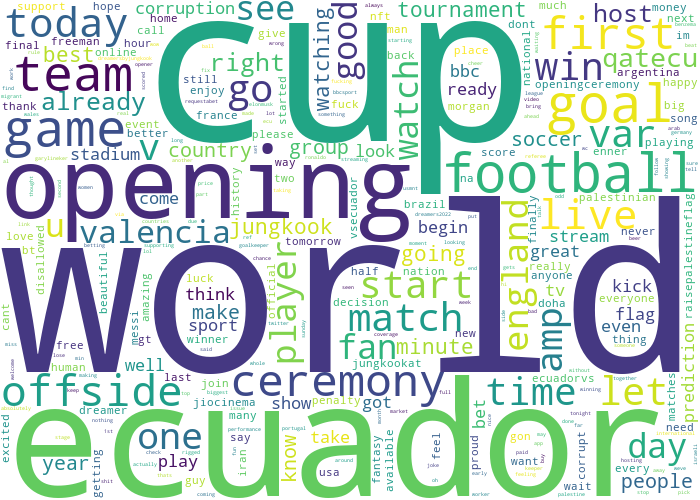

In [24]:
#Generate the text
text = ' '.join(txt_clean)

#Create a WordCloud objet
wordcloud = WordCloud(background_color="white",max_words=300,contour_width=3,contour_color='steelblue',width=700, height=500,
                     scale=1,max_font_size=500,
                     collocations=False)

wordcloud.generate(text)

wordcloud.to_image()

In [25]:
df.head(1)

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,readable_dates,Date Created2,hours,cleaned_tweets
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,what are we drinking today @tucantribe \n@madbears_ \n@lkinc_algo \n@al_goanna \n\n#worldcup2022 https://t.co/oga3tzvg5h,neutral,2022-11-20 23:59:21+00:00,2022-11-20,23,what are we drinking today tucantribe madbears_ lkinc_algo al_goanna


# Modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = df['cleaned_tweets']
y = df['Sentiment']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

In [30]:
# Naive Bayes classifier train
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [31]:
# Make predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6847946725860156
Classification Report:
               precision    recall  f1-score   support

    negative       0.61      0.81      0.70      1149
     neutral       0.69      0.53      0.60      1648
    positive       0.74      0.75      0.74      1708

    accuracy                           0.68      4505
   macro avg       0.68      0.70      0.68      4505
weighted avg       0.69      0.68      0.68      4505

